In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Simulación de datos de la máquina despulpadora
data = {
    'peso_almendra': np.random.uniform(0.5, 2.0, 100),  # Peso en gramos
    'humedad': np.random.uniform(10, 30, 100),  # Humedad en %
    'tiempo_procesamiento': np.random.uniform(5, 20, 100),  # Tiempo en segundos
    'estado_tambor': np.random.choice([0, 1], 100),  # 0 = Apagado, 1 = Encendido
    'calidad': np.random.choice(["Alta", "Media", "Baja"], 100)  # Clasificación de calidad
}

In [ ]:
# Convertir a DataFrame
df = pd.DataFrame(data)
print("Primeras filas del dataset:")
print(df.head())


Primeras filas del dataset:
   peso_almendra    humedad  tiempo_procesamiento  estado_tambor calidad
0       1.178786  22.566528             18.351673              0    Baja
1       0.705768  24.279742              7.482409              1   Media
2       0.832496  10.626293              7.962468              1    Alta
3       1.784981  19.758189             10.066171              0    Baja
4       1.601792  28.166883             14.933739              0    Baja


In [ ]:
# Convertir la variable de calidad en valores numéricos
calidad_map = {"Baja": 0, "Media": 1, "Alta": 2}
df['calidad'] = df['calidad'].map(calidad_map)

In [ ]:
# Definir las características (X) y la variable objetivo (y)
X = df.drop(columns=['calidad'])
y = df['calidad']

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo con Árbol de Decisión
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
# Entrenar el modelo
tree_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = tree_model.predict(X_test)


In [ ]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.45
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.56      0.90      0.69        10
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         5

    accuracy                           0.45        20
   macro avg       0.19      0.30      0.23        20
weighted avg       0.28      0.45      0.35        20



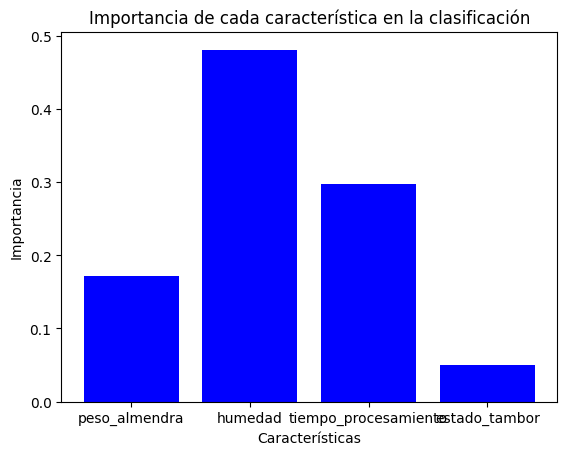

In [ ]:
# Visualización de importancia de características
importances = tree_model.feature_importances_
plt.bar(X.columns, importances, color='blue')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de cada característica en la clasificación')
plt.show()